In [1]:
# copy from 
# https://github.com/trnkatomas/Keras_2_examples/blob/master/Simple_LSTM_keras_2.0.ipynb

import keras
import tensorflow as tf
%matplotlib inline
import os, sys
os.environ["CUDA_VISIBLE_DEVICES"]="1"

Using TensorFlow backend.


In [2]:
print("python:{}, keras:{}, tensorflow: {}".format(sys.version, keras.__version__, tf.__version__))

python:3.5.3 (default, Jan 19 2017, 14:11:04) 
[GCC 6.3.0 20170118], keras:2.0.4, tensorflow: 1.1.0


In [3]:
from keras.models import Sequential  
from keras.layers.core import Dense, Activation  
from keras.layers.recurrent import LSTM

in_out_neurons = 2  
hidden_neurons = 300

model = Sequential()
model.add(LSTM(hidden_neurons, return_sequences=False,
               input_shape=(None, in_out_neurons)))
model.add(Dense(in_out_neurons, input_dim=hidden_neurons))  
model.add(Activation("linear"))  
model.compile(loss="mean_squared_error", optimizer="rmsprop")  

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 300)               363600    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 602       
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 364,202
Trainable params: 364,202
Non-trainable params: 0
_________________________________________________________________


In [11]:
import pandas as pd  
from random import random

flow = (list(range(1,10,1)) + list(range(10,1,-1)))*100
pdata = pd.DataFrame({"a":flow, "b":flow})  
pdata.b = pdata.b.shift(9)  
data = pdata.iloc[10:] * random()  # some noise  
print(data.shape)

(1790, 2)


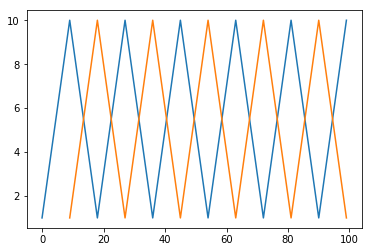

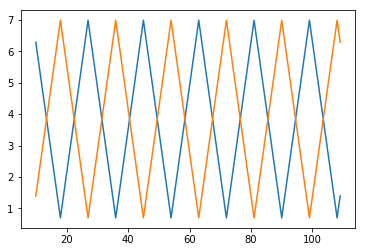

In [6]:
import matplotlib.pylab as plt
plt.plot(pdata[:100])
plt.show()
plt.plot(data[:100])
plt.show()

In [ ]:
import numpy as np

def _load_data(data, n_prev = 100):  
    """
    data should be pd.DataFrame()
    """

    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev].as_matrix())
        docY.append(data.iloc[i+n_prev].as_matrix())
    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY

def train_test_split(df, test_size=0.1):  
    """
    This just splits data to training and testing parts
    """
    ntrn = round(len(df) * (1 - test_size))

    X_train, y_train = _load_data(df.iloc[0:ntrn])
    X_test, y_test = _load_data(df.iloc[ntrn:])

    return (X_train, y_train), (X_test, y_test)

print('done')

In [12]:
(X_train, y_train), (X_test, y_test) = train_test_split(data)  # retrieve data

# and now train the model
# batch_size should be appropriate to your memory size
# number of epochs should be higher for real world problems
model.fit(X_train, y_train, batch_size=450, epochs=10, validation_split=0.05)  

Train on 1435 samples, validate on 76 samples
Epoch 1/10
1435/1435 [==============================] - 34s - loss: 0.5091 - val_loss: 0.1585
Epoch 2/10
1435/1435 [==============================] - 34s - loss: 0.1667 - val_loss: 0.2900
Epoch 3/10
1435/1435 [==============================] - 34s - loss: 0.2185 - val_loss: 0.1456
Epoch 4/10
1435/1435 [==============================] - 33s - loss: 0.1503 - val_loss: 0.2568
Epoch 5/10
1435/1435 [==============================] - 34s - loss: 0.2545 - val_loss: 0.2498
Epoch 6/10
1435/1435 [==============================] - 33s - loss: 0.3168 - val_loss: 0.2272
Epoch 7/10
1435/1435 [==============================] - 36s - loss: 0.1227 - val_loss: 0.2060
Epoch 8/10
1435/1435 [==============================] - 36s - loss: 0.3179 - val_loss: 0.0911
Epoch 9/10
1435/1435 [==============================] - 33s - loss: 0.0875 - val_loss: 0.2655
Epoch 10/10
1435/1435 [==============================] - 33s - loss: 0.3086 - val_loss: 0.2324


In [ ]:
predicted = model.predict(X_test)  
rmse = np.sqrt(((predicted - y_test) ** 2).mean(axis=0))

In [ ]:
plt.rcParams["figure.figsize"] = (17, 9)
plt.plot(predicted[:100][:,0],"--")
plt.plot(predicted[:100][:,1],"--")
plt.plot(y_test[:100][:,0],":")
plt.plot(y_test[:100][:,1],":")
plt.legend(["Prediction 0", "Prediction 1", "Test 0", "Test 1"])